In [14]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import warnings
import json
import glob
warnings.filterwarnings('ignore')

In [15]:
l = [pd.read_json(filename) for filename in glob.glob("../../../paper/data/frankfurt/*.json")]
#l = [pd.read_json(filename) for filename in glob.glob("backups/frankfurt/*.json")]
df = pd.concat(l, axis=0, ignore_index = True, verify_integrity = True)
print(df)

       status                                     resolver       domain  \
0          ok                 https://dns.google/dns-query  netflix.com   
1          ok                 https://dns.google/dns-query   google.com   
2          ok              https://dns.aa.net.uk/dns-query   google.com   
3          ok              https://dns.aa.net.uk/dns-query  netflix.com   
4          ok   https://adfree.usableprivacy.net/dns-query   google.com   
...       ...                                          ...          ...   
273469     ok  https://anycast.uncensoreddns.org/dns-query  netflix.com   
273470     ok              https://sg.yepdns.com/dns-query   google.com   
273471     ok              https://sg.yepdns.com/dns-query  netflix.com   
273472     ok            https://doh.xfinity.com/dns-query   google.com   
273473     ok            https://doh.xfinity.com/dns-query  netflix.com   

             rtime  size_or_error   ping_time            datetime  
0        51.480540             

In [16]:
r = pd.read_json('resolver_geolocation.json')
ip_europe = r[(r['country_name']=='France') | (r['country_name']=='Austria') | (r['country_name']=='Russia') | (r['country_name']=='Netherlands') | (r['country_name']=='Spain') | (r['country_name']=='Luxembourg') | (r['country_name']=='Czechia')  | (r['country_name']=='Switzerland')  | (r['country_name']=='United Kingdom')  | (r['country_name']=='Finland')  | (r['country_name']=='Germany')  | (r['country_name']=='Sweden')  | (r['country_name']=='Denmark')]
ip_asia = r[(r['country_name']=='Cyprus') | (r['country_name']=='India') | (r['country_name']=='China') | (r['country_name']=='Japan') | (r['country_name']=='Singapore')  | (r['country_name']=='Indonesia') | (r['country_name']=='Hong Kong')| (r['country_name']=='Taiwan')]
ip_north_america = r[(r['country_name']=='United States') | (r['country_name']=='Canada') ]
ip_australia = r[(r['country_name']=='Australia')]
ip_not_found = r[(r['IP_address'] == 'None')]
r.head()

#Switch Cloudflare from Aus to NA
ip_australia = ip_australia.drop(labels=17, axis=0)
ip_australia = ip_australia.drop(labels=18, axis=0)
ip_australia = ip_australia.drop(labels=19, axis=0)

In [17]:
google = {'resolver':'https://dns.google/dns-query','IP_address':'8.8.8.8','country_iso_code':'US','country_name': 'United States', 'city_name':'None'}

cloudflare1 = {'resolver':'https://dns.cloudflare.com/dns-query','IP_address':'1.0.0.1','country_iso_code':'US','country_name': 'United States', 'city_name':'None'}
cloudflare2 = {'resolver':'https://family.cloudflare-dns.com/dns-query','IP_address':'1.0.0.3','country_iso_code':'US', 'country_name': 'United States', 'city_name':'None'}
cloudflare3 = {'resolver':'https://security.cloudflare-dns.com/dns-query','IP_address':'1.0.0.2','country_iso_code':'US', 'country_name': 'United States', 'city_name':'None'}

quad9_1 = {'resolver':'https://dns9.quad9.net/dns-query','IP_address':'9.9.9.9','country_iso_code':'US','country_name': 'United States', 'city_name':'Berkeley'}
quad9_2 = {'resolver':'https://dns9.quad9.net/dns-query','IP_address':'9.9.9.10','country_iso_code':'US','country_name': 'United States', 'city_name':'None'}

ordns = {'resolver':'https://ordns.he.net/dns-query','IP_address':'74.82.42.42','country_iso_code':'US','country_name': 'United States', 'city_name':'None'}

ip_north_america = ip_north_america.append(cloudflare1, ignore_index = True)
ip_north_america = ip_north_america.append(cloudflare2, ignore_index = True)
ip_north_america = ip_north_america.append(cloudflare3, ignore_index = True)

ip_asia = ip_asia.append(cloudflare1, ignore_index = True)
ip_asia = ip_asia.append(cloudflare2, ignore_index = True)
ip_asia = ip_asia.append(cloudflare3, ignore_index = True)

ip_europe = ip_europe.append(cloudflare1, ignore_index = True)
ip_europe = ip_europe.append(cloudflare2, ignore_index = True)
ip_europe = ip_europe.append(cloudflare3, ignore_index = True)

ip_europe = ip_europe.append(google, ignore_index = True)
ip_asia = ip_asia.append(google, ignore_index = True)

ip_asia = ip_asia.append(quad9_1, ignore_index = True)
ip_asia = ip_asia.append(quad9_2, ignore_index = True)

ip_europe = ip_europe.append(quad9_1, ignore_index = True)
ip_europe = ip_europe.append(quad9_2, ignore_index = True)

ip_europe = ip_europe.append(ordns, ignore_index = True)
ip_asia = ip_asia.append(ordns, ignore_index = True)

In [18]:
# Median of each resolver in ascending order(removed the ones with nan)
NA_array_of_resolvers = pd.Series(ip_north_america['resolver']).unique()

NA_df = df.loc[df.resolver.isin(NA_array_of_resolvers)]
#print(NA_df)

NA_medians = NA_df.groupby('resolver').rtime.median()
print(NA_medians)

NA_medians = NA_medians.dropna()
NA_medians = NA_medians[NA_medians > 0]
NA_medians = NA_medians.sort_values(ascending=False)
#print(NA_medians)

resolver
https://adblock.doh.mullvad.net/dns-query         11.257451
https://dns.cloudflare.com/dns-query              13.522834
https://dns.google/dns-query                      20.209251
https://dns.nextdns.io/dns-query                  22.579225
https://dns1.dnscrypt.ca/dns-query                      NaN
https://dns2.dnscrypt.ca/dns-query                      NaN
https://dns9.quad9.net/dns-query                  18.610023
https://doh.cleanbrowsing.org/dns-query                 NaN
https://doh.la.ahadns.net/dns-query              438.667795
https://doh.mullvad.net/dns-query                 10.978438
https://doh.post-factum.tk/dns-query                    NaN
https://doh.xfinity.com/dns-query                510.387601
https://dohtrial.att.net/dns-query               389.191797
https://draco.plan9-ns2.com/dns-query            342.397233
https://family.cloudflare-dns.com/dns-query       16.923697
https://ordns.he.net/dns-query                    12.432489
https://security.cloudflare-dns

In [19]:
#Median of each resolver in NA (removed the ones with nan)

NA_array_of_resolvers = pd.Series(ip_north_america['resolver']).unique()

NA_dict_resp_time_series={}
NA_length=len(NA_array_of_resolvers)

NA_both_resp=[0]*NA_length
NA_resp_time_series=[0]*NA_length

for i in range(NA_length):
    NA_both_resp[i]=df[(df['resolver']==NA_array_of_resolvers[i])]
    NA_resp_time_series[i]=(NA_both_resp[i]['rtime'])
    y_axis = NA_array_of_resolvers
    NA_temp = [s.replace("https://", "") for s in y_axis]
    NA_new_list = [s.replace("/dns-query", "") for s in NA_temp]
    NA_dict_resp_time_series[NA_new_list[i]]= NA_resp_time_series[i]
NA_frame_to_plot=pd.DataFrame(NA_dict_resp_time_series)

medians = NA_frame_to_plot.median()
medians.sort_values(ascending=False, inplace=True)
NA_response_times = NA_frame_to_plot[medians.index]

NA_clear=[]
for a in range(len(NA_new_list)):
    x = NA_new_list[a]
    if NA_response_times[x].count() != 0.0:
        print (x, ":", NA_response_times[x].median())
        NA_clear.append(x)
#print(NA_clear)

dns.google : 20.209251000000002
doh.la.ahadns.net : 438.6677945
dohtrial.att.net : 389.191797
ordns.he.net : 12.432489
adblock.doh.mullvad.net : 11.257451499999998
doh.mullvad.net : 10.978438
dns.nextdns.io : 22.5792255
draco.plan9-ns2.com : 342.397233
dns9.quad9.net : 18.610022999999998
doh.xfinity.com : 510.38760149999996
dns.cloudflare.com : 13.522834
family.cloudflare-dns.com : 16.9236975
security.cloudflare-dns.com : 16.773659


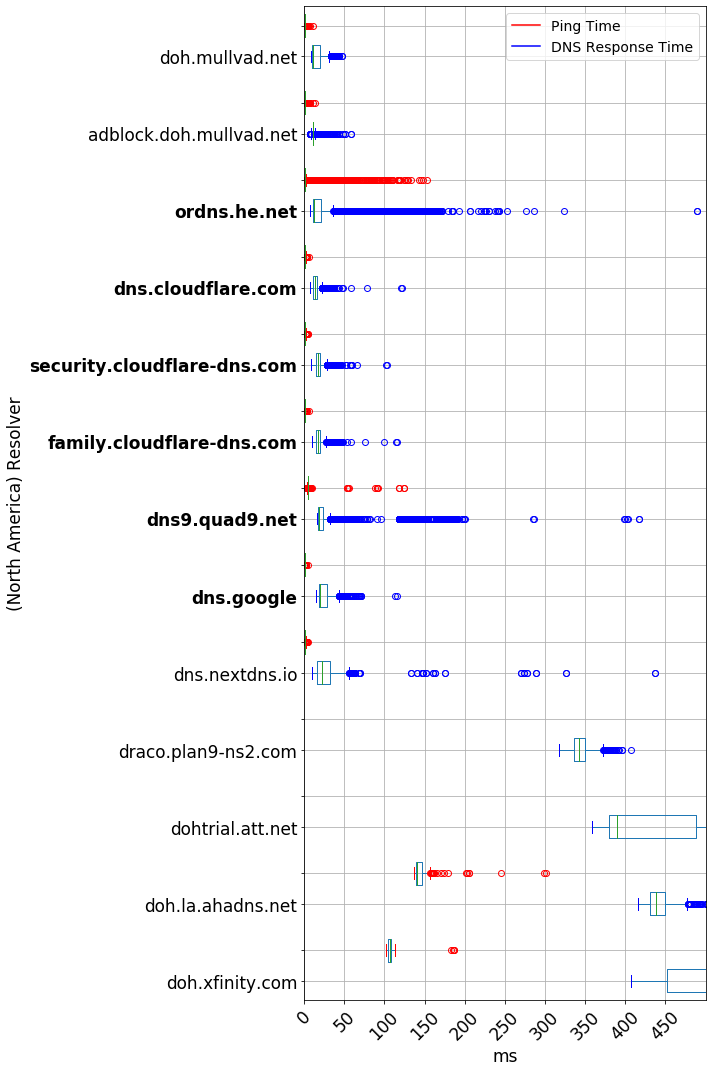

In [33]:
## This boxplot sorts by ascending order of DNS response time

# North America Boxplot
NA_array_of_resolvers = pd.Series(ip_north_america['resolver']).unique()

NA_dict_resp_time_series={}
NA_length=len(NA_array_of_resolvers)

NA_both_resp=[0]*NA_length
NA_resp_time_series=[0]*NA_length

for i in range(NA_length):
    NA_both_resp[i]=df[(df['resolver']==NA_array_of_resolvers[i])]
    NA_resp_time_series[i]=(NA_both_resp[i]['rtime'])
    y_axis = NA_array_of_resolvers
    NA_temp = [s.replace("https://", "") for s in y_axis]
    NA_new_list = [s.replace("/dns-query", "") for s in NA_temp]
    if(NA_new_list[i] in NA_clear):
        NA_dict_resp_time_series[NA_new_list[i]]= NA_resp_time_series[i]
NA_frame_to_plot=pd.DataFrame(NA_dict_resp_time_series)


# North America Boxplot for Ping Time

NA_dict_ping_series={}


NA_both_ping=[0]*NA_length
NA_ping_series = [0]*NA_length
for i in range(NA_length):
    NA_both_ping[i]=df[(df['resolver']==NA_array_of_resolvers[i])]
    NA_ping_series[i]=(NA_both_ping[i]['ping_time'])
    y_axis = NA_array_of_resolvers
    NA_temp = [s.replace("https://", "") for s in y_axis]
    NA_new_list = [s.replace("/dns-query", "") for s in NA_temp]
    if(NA_new_list[i] in NA_clear):
        NA_dict_ping_series[NA_new_list[i]]= NA_ping_series[i]
NA_ping_frame_to_plot=pd.DataFrame(NA_dict_ping_series)
NA_ping = NA_ping_frame_to_plot


#Make two plots and merge
c = "blue"
z = "red"



medians = NA_frame_to_plot.median()
medians.sort_values(ascending=False, inplace=True)
ping_times = NA_ping[medians.index]
NA_response_times = NA_frame_to_plot[medians.index]


NA_boxplot = NA_response_times.boxplot(vert=False,figsize=(10,15),showfliers=True,capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c), meanprops=dict(color=c),  positions=np.array(range(len(NA_dict_resp_time_series)))*2.0-0.4, widths=0.6)
NA_ping_boxplot = ping_times.boxplot(vert=False,figsize=(10,15),showfliers=True,capprops=dict(color=z),whiskerprops=dict(color=z),flierprops=dict(color=z, markeredgecolor=z),medianprops=dict(color=z), meanprops=dict(color=z), positions=np.array(range(len(NA_dict_ping_series)))*2.0+0.4, widths=0.6)

plt.plot([], c='red', label='Ping Time')
plt.plot([], c='blue', label='DNS Response Time')
plt.legend(loc = 'upper right', fontsize=14)

xl = 500
plt.xlim(0,xl)
plt.xlabel('ms', fontsize=17)
plt.xticks(rotation=45)
plt.ylabel('(North America) Resolver', fontsize=17)
plt.gca().get_yticklabels()[10].set_weight("bold")
plt.gca().get_yticklabels()[9].set_weight("bold")
plt.gca().get_yticklabels()[8].set_weight("bold")
plt.gca().get_yticklabels()[7].set_weight("bold")
plt.gca().get_yticklabels()[6].set_weight("bold")
plt.gca().get_yticklabels()[5].set_weight("bold")

#plt.xscale('log')

plt.xticks(np.arange(0, xl, step=50), fontsize=17)
plt.yticks(fontsize=17)
plt.tight_layout()
plt.grid(True)
plt.savefig("../../../paper/figures/Frankfurt_North_America.pdf")
plt.show()

In [21]:
# Median of each resolver in ascending order (removed the ones with nan) 
asia_array_of_resolvers = pd.Series(ip_asia['resolver']).unique()

asia_df = df.loc[df.resolver.isin(asia_array_of_resolvers)]
#print(asia_df)

asia_medians = asia_df.groupby('resolver').rtime.median()
#print(asia_medians)

asia_medians = asia_medians.dropna()
asia_medians = asia_medians[asia_medians > 0]
#asia_medians = asia_medians.sort_values(ascending=False)
print(asia_medians)

resolver
https://dns.adguard.com/dns-query                    7.580134
https://dns.alidns.com/dns-query                    16.749163
https://dns.arapurayil.com/dns-query               364.520561
https://dns.cloudflare.com/dns-query                13.522834
https://dns.google/dns-query                        20.209251
https://dns.therifleman.name/dns-query             396.162304
https://dns.twnic.tw/dns-query                   32319.900813
https://dns9.quad9.net/dns-query                    18.610023
https://doh-jp.blahdns.com/dns-query               773.471798
https://doh-sg.blahdns.com/dns-query               534.508280
https://doh.in.ahadns.net/dns-query                397.585915
https://doh.opendns.com/dns-query                   29.731112
https://doh.pub/dns-query                          276.148888
https://doh.this.web.id/dns-query                   40.046579
https://doh.tiar.app/dns-query                     510.451402
https://family.cloudflare-dns.com/dns-query         16.923697

In [22]:
#Median of each resolver in Asia (removed the ones with nan)

asia_array_of_resolvers = pd.Series(ip_asia['resolver']).unique()

asia_dict_resp_time_series={}
asia_length=len(asia_array_of_resolvers)

asia_both_resp=[0]*asia_length
asia_resp_time_series=[0]*asia_length

for i in range(asia_length):
    asia_both_resp[i]=df[(df['resolver']==asia_array_of_resolvers[i])]
    asia_resp_time_series[i]=(asia_both_resp[i]['rtime'])
    y_axis = asia_array_of_resolvers
    asia_temp = [s.replace("https://", "") for s in y_axis]
    asia_new_list = [s.replace("/dns-query", "") for s in asia_temp]
    asia_dict_resp_time_series[asia_new_list[i]]= asia_resp_time_series[i]
asia_frame_to_plot=pd.DataFrame(asia_dict_resp_time_series)

medians = asia_frame_to_plot.median()
medians.sort_values(ascending=False, inplace=True)
asia_response_times = asia_frame_to_plot[medians.index]

asia_clear=[]
for a in range(len(asia_new_list)):
    x = asia_new_list[a]
    if asia_response_times[x].count() != 0.0:
        print (x, ":", asia_response_times[x].median())
        asia_clear.append(x)
#print(asia_clear)

dns.adguard.com : 7.5801345
doh.in.ahadns.net : 397.585915
dns.alidns.com : 16.749163000000003
dns.arapurayil.com : 364.520561
doh.opendns.com : 29.731112
dns.therifleman.name : 396.16230399999995
doh.pub : 276.1488885
doh-jp.blahdns.com : 773.471798
doh-sg.blahdns.com : 534.50828
doh.tiar.app : 510.451402
public.dns.iij.jp : 496.738765
doh.this.web.id : 40.046579
jp.tiar.app : 779.859506
dns.twnic.tw : 32319.900813
sg.yepdns.com : 548.671281
dns.cloudflare.com : 13.522834
family.cloudflare-dns.com : 16.9236975
security.cloudflare-dns.com : 16.773659
dns.google : 20.209251000000002
dns9.quad9.net : 18.610022999999998
ordns.he.net : 12.432489


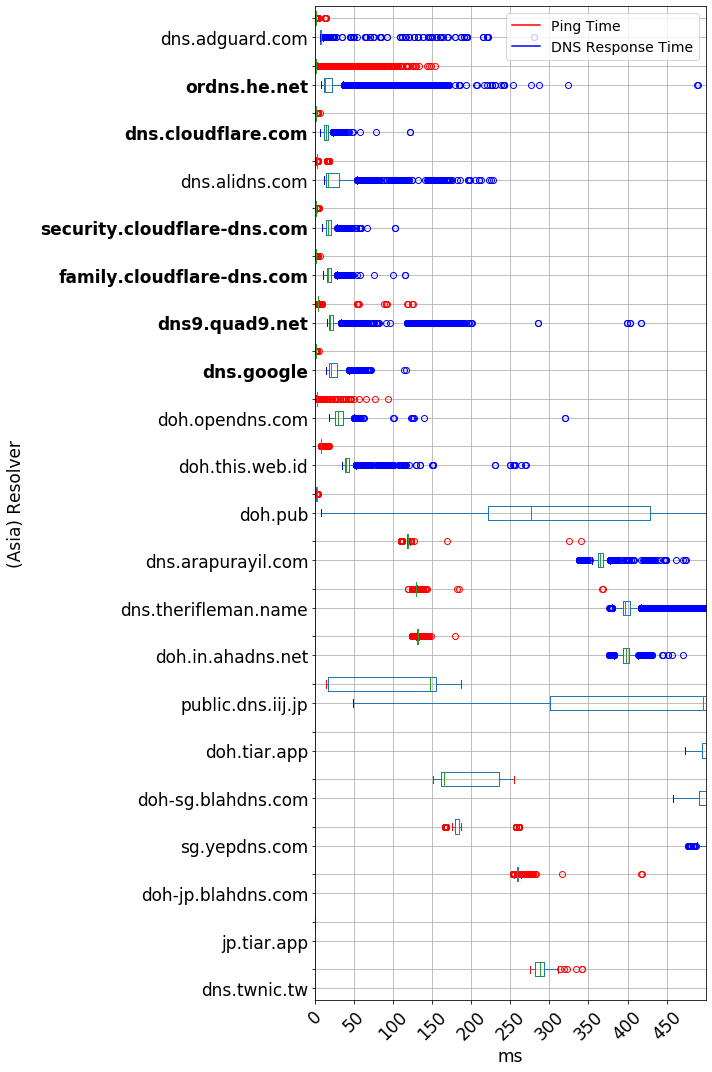

In [34]:
## This boxplot sorts by ascending order of DNS response time

# Asia Boxplot
asia_array_of_resolvers = pd.Series(ip_asia['resolver']).unique()

asia_dict_resp_time_series={}
asia_length=len(asia_array_of_resolvers)

asia_both_resp=[0]*asia_length
asia_resp_time_series=[0]*asia_length

for i in range(asia_length):
    asia_both_resp[i]=df[(df['resolver']==asia_array_of_resolvers[i])]
    asia_resp_time_series[i]=(asia_both_resp[i]['rtime'])
    y_axis = asia_array_of_resolvers
    asia_temp = [s.replace("https://", "") for s in y_axis]
    asia_new_list = [s.replace("/dns-query", "") for s in asia_temp]
    if(asia_new_list[i] in asia_clear):
        asia_dict_resp_time_series[asia_new_list[i]]= asia_resp_time_series[i]
asia_frame_to_plot=pd.DataFrame(asia_dict_resp_time_series)


# Asia Boxplot for Ping Time

asia_dict_ping_series={}


asia_both_ping=[0]*asia_length
asia_ping_series = [0]*asia_length
for i in range(asia_length):
    asia_both_ping[i]=df[(df['resolver']==asia_array_of_resolvers[i])]
    asia_ping_series[i]=(asia_both_ping[i]['ping_time'])
    y_axis = asia_array_of_resolvers
    asia_temp = [s.replace("https://", "") for s in y_axis]
    asia_new_list = [s.replace("/dns-query", "") for s in asia_temp]
    if(asia_new_list[i] in asia_clear):
        asia_dict_ping_series[asia_new_list[i]]= asia_ping_series[i]
asia_ping_frame_to_plot=pd.DataFrame(asia_dict_ping_series)
asia_ping = asia_ping_frame_to_plot


#Make two plots and merge
c = "blue"
z = "red"


medians = asia_frame_to_plot.median()
medians.sort_values(ascending=False, inplace=True)
ping_times = asia_ping[medians.index]
asia_response_times = asia_frame_to_plot[medians.index]


asia_boxplot = asia_response_times.boxplot(vert=False,figsize=(10,15),showfliers=True,capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c), meanprops=dict(color=c),  positions=np.array(range(len(asia_dict_resp_time_series)))*2.0-0.4, widths=0.6)
asia_ping_boxplot = ping_times.boxplot(vert=False,figsize=(10,15),showfliers=True,capprops=dict(color=z),whiskerprops=dict(color=z),flierprops=dict(color=z, markeredgecolor=z),medianprops=dict(color=z), meanprops=dict(color=z), positions=np.array(range(len(asia_dict_ping_series)))*2.0+0.4, widths=0.6)

plt.plot([], c='red', label='Ping Time')
plt.plot([], c='blue', label='DNS Response Time')
plt.legend(loc = 'upper right', fontsize=14)

xl = 500
plt.xlim(0,xl)
plt.xlabel('ms', fontsize=17)
plt.ylabel('(Asia) Resolver', labelpad=15, fontsize=17)
plt.gca().get_yticklabels()[19].set_weight("bold")
plt.gca().get_yticklabels()[16].set_weight("bold")
plt.gca().get_yticklabels()[15].set_weight("bold")
plt.gca().get_yticklabels()[14].set_weight("bold")
plt.gca().get_yticklabels()[13].set_weight("bold")
plt.gca().get_yticklabels()[18].set_weight("bold")
plt.xticks(np.arange(0, xl, step=50), rotation=45, fontsize=17)
plt.yticks(fontsize=17)
plt.grid(True)
plt.tight_layout()
plt.savefig("../../../paper/figures/Frankfurt_Asia.pdf")
plt.show()

In [24]:
# Median of each resolver in ascending order (removed the ones with nan) 
eur_array_of_resolvers = pd.Series(ip_europe['resolver']).unique()

eur_df = df.loc[df.resolver.isin(eur_array_of_resolvers)]
#print(eur_df)

eur_medians = eur_df.groupby('resolver').rtime.median()
#print(eur_medians)

eur_medians = eur_medians.dropna()
eur_medians = eur_medians[eur_medians > 0]
#eur_medians = eur_medians.sort_values(ascending=False)
print(eur_medians)


resolver
https://adfree.usableprivacy.net/dns-query                   108.226809
https://anycast.uncensoreddns.org/dns-query                   55.496975
https://dns-doh-no-safe-search.dnsforfamily.com/dns-query    135.876385
https://dns-doh.dnsforfamily.com/dns-query                   155.812296
https://dns-family.adguard.com/dns-query                       7.135951
https://dns.aa.net.uk/dns-query                               62.427622
https://dns.circl.lu/dns-query                                67.266996
https://dns.cloudflare.com/dns-query                          13.522834
https://dns.digitale-gesellschaft.ch/dns-query                32.369360
https://dns.dnshome.de/dns-query                              42.721874
https://dns.google/dns-query                                  20.209251
https://dns.njal.la/dns-query                                105.319613
https://dns.switch.ch/dns-query                               42.047447
https://dns1.ryan-palmer.com/dns-query                 

In [25]:
#Median of each resolver in Europe (removed the ones with nan)

eur_array_of_resolvers = pd.Series(ip_europe['resolver']).unique()

eur_dict_resp_time_series={}
eur_length=len(eur_array_of_resolvers)

eur_both_resp=[0]*eur_length
eur_resp_time_series=[0]*eur_length

for i in range(eur_length):
    eur_both_resp[i]=df[(df['resolver']==eur_array_of_resolvers[i])]
    eur_resp_time_series[i]=(eur_both_resp[i]['rtime'])
    y_axis = eur_array_of_resolvers
    eur_temp = [s.replace("https://", "") for s in y_axis]
    eur_new_list = [s.replace("/dns-query", "") for s in eur_temp]
    eur_dict_resp_time_series[eur_new_list[i]]= eur_resp_time_series[i]
eur_frame_to_plot=pd.DataFrame(eur_dict_resp_time_series)

medians = eur_frame_to_plot.median()
medians.sort_values(ascending=False, inplace=True)
eur_response_times = eur_frame_to_plot[medians.index]

eur_clear=[]
for a in range(len(eur_new_list)):
    x = eur_new_list[a]
    if eur_response_times[x].count() != 0.0:
        print (x, ":", eur_response_times[x].median())
        eur_clear.append(x)
#print(eur_clear)

dns.aa.net.uk : 62.4276215
adfree.usableprivacy.net : 108.2268085
dns-family.adguard.com : 7.135951
doh.nl.ahadns.net : 35.8887955
dnsnl-noads.alekberg.net : 57.7346085
dnsnl.alekberg.net : 57.286123
dnses.alekberg.net : 119.761893
dns.circl.lu : 67.266996
odvr.nic.cz : 52.536496
dns.digitale-gesellschaft.ch : 32.3693595
dns1.ryan-palmer.com : 61.8278005
dns-doh.dnsforfamily.com : 155.812296
dns-doh-no-safe-search.dnsforfamily.com : 135.8763855
dnsforge.de : 31.864624
dns.dnshome.de : 42.721874
doh-ch.blahdns.com : 32.551976999999994
doh-de.blahdns.com : 28.596836
doh-fi.blahdns.com : 94.2587465
ibksturm.synology.me : 132.6633195
doh.ffmuc.net : 108.92584049999999
doh.libredns.gr : 18.995012
dns.njal.la : 105.3196125
dnsse.alekberg.net : 103.539455
dns.switch.ch : 42.047447
unicast.uncensoreddns.org : 52.781496000000004
anycast.uncensoreddns.org : 55.4969755
dns.cloudflare.com : 13.522834
family.cloudflare-dns.com : 16.9236975
security.cloudflare-dns.com : 16.773659
dns.google : 20.209

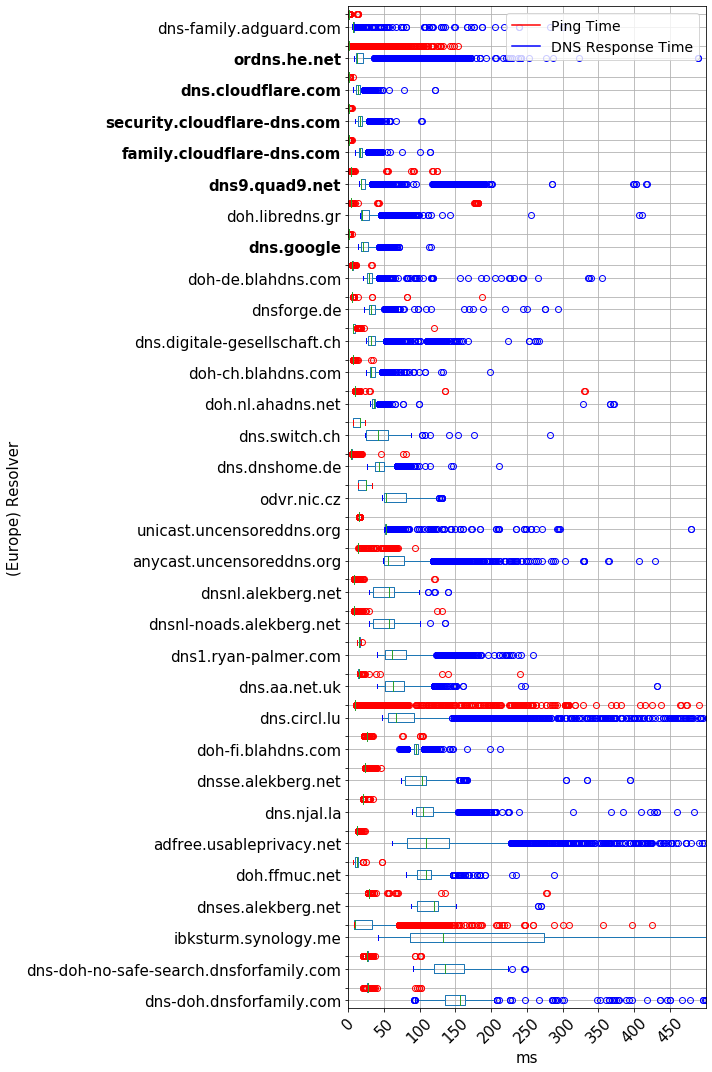

In [35]:
## This boxplot sorts by ascending order of DNS response time
# Europe Boxplot
eur_array_of_resolvers = pd.Series(ip_europe['resolver']).unique()

eur_dict_resp_time_series={}
eur_length=len(eur_array_of_resolvers)

eur_both_resp=[0]*eur_length
eur_resp_time_series=[0]*eur_length

for i in range(eur_length):
    eur_both_resp[i]=df[(df['resolver']==eur_array_of_resolvers[i])]
    eur_resp_time_series[i]=(eur_both_resp[i]['rtime'])
    y_axis = eur_array_of_resolvers
    eur_temp = [s.replace("https://", "") for s in y_axis]
    eur_new_list = [s.replace("/dns-query", "") for s in eur_temp]
    if(eur_new_list[i] in eur_clear):
        eur_dict_resp_time_series[eur_new_list[i]]= eur_resp_time_series[i]
eur_frame_to_plot=pd.DataFrame(eur_dict_resp_time_series)


# Europe Boxplot for Ping Time

eur_dict_ping_series={}


eur_both_ping=[0]*eur_length
eur_ping_series = [0]*eur_length
for i in range(eur_length):
    eur_both_ping[i]=df[(df['resolver']==eur_array_of_resolvers[i])]
    eur_ping_series[i]=(eur_both_ping[i]['ping_time'])
    y_axis = eur_array_of_resolvers
    eur_temp = [s.replace("https://", "") for s in y_axis]
    eur_new_list = [s.replace("/dns-query", "") for s in eur_temp]
    if(eur_new_list[i] in eur_clear):
        eur_dict_ping_series[eur_new_list[i]]= eur_ping_series[i]
eur_ping_frame_to_plot=pd.DataFrame(eur_dict_ping_series)
eur_ping = eur_ping_frame_to_plot


#Make two plots and merge
c = "blue"
z = "red"


medians = eur_frame_to_plot.median()
medians.sort_values(ascending=False, inplace=True)
ping_times = eur_ping[medians.index]
eur_response_times = eur_frame_to_plot[medians.index]


eur_boxplot = eur_response_times.boxplot(vert=False,figsize=(10,15),showfliers=True,capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c), meanprops=dict(color=c),  positions=np.array(range(len(eur_dict_resp_time_series)))*2.0-0.4, widths=0.6)
eur_ping_boxplot = ping_times.boxplot(vert=False,figsize=(10,15),showfliers=True,capprops=dict(color=z),whiskerprops=dict(color=z),flierprops=dict(color=z, markeredgecolor=z),medianprops=dict(color=z), meanprops=dict(color=z), positions=np.array(range(len(eur_dict_ping_series)))*2.0+0.4, widths=0.6)

plt.plot([], c='red', label='Ping Time')
plt.plot([], c='blue', label='DNS Response Time')
plt.legend(loc = 'upper right', fontsize=14)

xl = 500
plt.xlim(0,xl)
plt.xlabel('ms', fontsize=15)
plt.ylabel('(Europe) Resolver', fontsize=15)
plt.gca().get_yticklabels()[30].set_weight("bold")
plt.gca().get_yticklabels()[29].set_weight("bold")
plt.gca().get_yticklabels()[28].set_weight("bold")
plt.gca().get_yticklabels()[27].set_weight("bold")
plt.gca().get_yticklabels()[26].set_weight("bold")
plt.gca().get_yticklabels()[24].set_weight("bold")
plt.xticks(np.arange(0, xl, step=50), rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.savefig("../../../paper/figures/Frankfurt_Europe.pdf")
plt.show()